In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import show_versions
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns

In [91]:
show_versions()


System:
    python: 3.12.8 (tags/v3.12.8:2dc476b, Dec  3 2024, 19:30:04) [MSC v.1942 64 bit (AMD64)]
executable: D:\ML_AI\.venv\Scripts\python.exe
   machine: Windows-11-10.0.26200-SP0

Python dependencies:
      sklearn: 1.7.2
          pip: 25.1.1
   setuptools: 80.9.0
        numpy: 1.26.4
        scipy: 1.16.3
       Cython: None
       pandas: 2.3.3
   matplotlib: 3.10.7
       joblib: 1.5.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: D:\ML_AI\.venv\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Cooperlake

       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libscipy_openblas
       filepath: D:\ML_AI\.venv\Lib\site-packages\scipy.libs\libscipy_openblas-48c358d105077551cc9cc3ba

In [92]:
dt_cfl = LogisticRegression()

In [93]:
dt_cfl

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [94]:
svc_clf = SVC()
knn_clf = KNeighborsClassifier()


In [95]:
weights=[0.5, 0.5]

In [96]:
X, y = make_classification(
        n_samples=100000,
        n_classes=len(weights),
        n_informative=len(weights),
        weights=weights,
        flip_y=0,
        random_state=1
    )

In [97]:
X[2]

array([ 0.51444194,  0.18584345,  0.4570103 , -1.02581457,  0.32841901,
        0.95206901,  0.26731726,  0.59881274,  1.78392306, -1.29893497,
       -0.10770237, -0.69775915,  0.59946011,  1.36579669,  0.54956988,
       -0.72500119, -1.47992566,  0.21515271, -1.87477245, -0.61607733])

In [98]:
X[3]

array([-1.37761272,  1.98361458,  1.21805945,  0.50507323,  0.46055776,
       -1.0192091 , -0.6543891 , -0.38765228,  1.09779157,  1.50654931,
        0.58459286,  1.90869455, -1.10477159,  0.85851452, -1.1597748 ,
       -0.50708939,  3.17277247,  1.35294811,  0.3488237 ,  0.79451293])

In [99]:
df_X = pd.DataFrame(X, columns=[f'feature{i}' for i in range(X.shape[1])])
df_y = pd.DataFrame(y, columns=['label'])

In [100]:
df_X


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
0,-0.200569,-1.809520,-0.282365,0.069004,-1.595686,-0.246584,0.250509,0.464241,-0.311104,0.324040,1.050053,0.625544,-1.058147,-0.601399,-2.246342,-0.024476,0.177953,-0.464522,0.662523,-0.488723
1,-0.468335,-1.726135,-0.467595,0.023038,2.184683,0.689784,1.593927,-0.706890,-0.951095,-0.916657,-2.056557,-0.267301,-0.607474,1.478321,0.845826,1.398136,0.731832,-0.599669,-1.707546,0.981171
2,0.514442,0.185843,0.457010,-1.025815,0.328419,0.952069,0.267317,0.598813,1.783923,-1.298935,-0.107702,-0.697759,0.599460,1.365797,0.549570,-0.725001,-1.479926,0.215153,-1.874772,-0.616077
3,-1.377613,1.983615,1.218059,0.505073,0.460558,-1.019209,-0.654389,-0.387652,1.097792,1.506549,0.584593,1.908695,-1.104772,0.858515,-1.159775,-0.507089,3.172772,1.352948,0.348824,0.794513
4,-0.560407,-0.447211,-0.075926,-0.104206,-0.006868,-0.869278,1.279898,0.386543,-1.443960,1.294257,0.375417,0.599804,-1.282822,0.918837,-0.716216,0.308139,-1.586087,0.749946,0.164168,-0.171890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.050870,0.249899,1.240607,0.321464,-1.045780,1.781409,0.612259,0.562918,-0.332539,-2.495224,-0.142112,-1.883973,-1.275329,1.259407,0.827241,0.652424,0.748047,0.009186,-2.581753,-0.258939
99996,-0.203141,-0.543342,-2.289904,0.368007,-0.825037,-0.473927,1.395834,-0.994369,-1.028289,0.766961,-1.432493,-1.032952,1.427595,1.727886,0.895140,-0.271545,0.568751,-1.084327,-0.787181,0.850666
99997,0.629240,0.768656,0.037296,1.167493,-0.022355,0.197000,0.988185,1.060395,1.924894,-0.214208,-0.810559,-0.151984,-0.051953,1.374090,-0.334497,0.814162,0.843414,0.068596,-1.167821,0.756794
99998,1.726178,2.045334,-0.317037,-0.190159,-0.443130,0.631453,-0.585602,1.299206,0.296046,-0.955733,-0.690601,-0.017277,0.049360,-0.978924,-0.711586,-1.147405,-0.874674,0.535619,0.103302,-0.739420


In [101]:
df_y.value_counts()

label
0        50000
1        50000
Name: count, dtype: int64

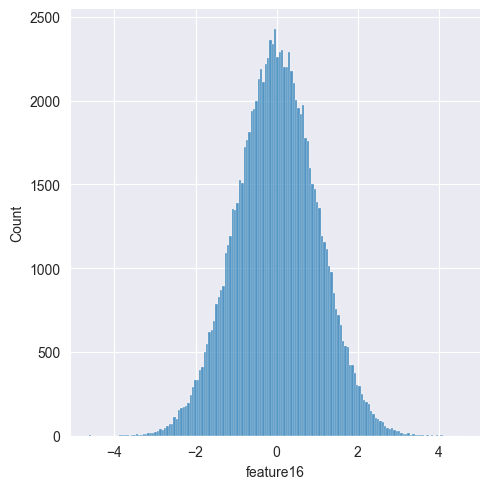

In [102]:
sns.displot(df_X['feature16'], kind='hist')


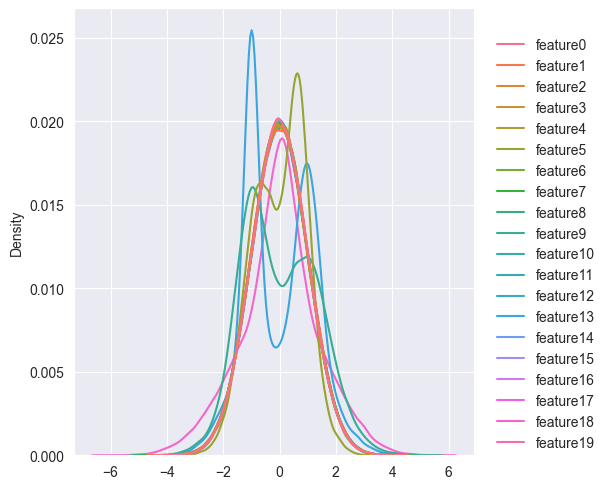

In [103]:
sns.displot(df_X, kind='kde')

In [104]:
def slit_data(data):
    fit_data = data[:int(len(data) * 0.8)]
    predict_data = data[int(len(data) * 0.8) : int(len(data) * 0.9)]
    score_data = data[int(len(data) * 0.9):]
    return (fit_data, predict_data, score_data)

In [105]:
split_X = slit_data(X)
split_y = slit_data(y)

In [106]:
split_X[0].shape

(80000, 20)

In [107]:
dt_cfl.fit(split_X[0], split_y[0])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [108]:
dt_cfl.score(X=split_X[2], y=split_y[2])

0.9178

In [109]:
dt_cfl.predict(X=split_X[1])

array([1, 0, 1, ..., 1, 0, 1])

In [110]:
split_y[1]

array([0, 0, 1, ..., 1, 0, 0])

In [111]:
df = pd.DataFrame({
    'predict': dt_cfl.predict(X=split_X[1]),
    'labels': split_y[1],
    'result': dt_cfl.predict(X=split_X[1])==split_y[1]}
)

In [112]:
df['result'].value_counts()

result
True     9218
False     782
Name: count, dtype: int64

In [113]:
df[df['result']==False]

,predict,labels,result
0,1,0,False
14,1,0,False
24,0,1,False
33,1,0,False
39,0,1,False
...,...,...,...
9943,1,0,False
9987,0,1,False
9988,0,1,False
9990,1,0,False


### dt_clf Score 0.86 dla zestwu 600-wierszy Result 83 dla 400Wierszy score 0.83 i Result 0.81

In [114]:
svc_clf.fit(split_X[0], split_y[0])
knn_clf.fit(split_X[0], split_y[0])

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [115]:
svc_clf.score(X=split_X[2], y=split_y[2])

0.9329

In [116]:
knn_clf.score(X=split_X[2], y=split_y[2])

0.9131

In [117]:
df_svc = pd.DataFrame({
    'predict': svc_clf.predict(X=split_X[1]),
    'labels': split_y[1],
    'result': svc_clf.predict(X=split_X[1])==split_y[1]}
)

In [118]:
df_knn = pd.DataFrame({
    'predict': knn_clf.predict(X=split_X[1]),
    'labels': split_y[1],
    'result': knn_clf.predict(X=split_X[1])==split_y[1]}
)

In [135]:
print(df_svc['result'].value_counts())

result
True     9343
False     657
Name: count, dtype: int64


In [120]:
df_knn['result'].value_counts()

result
True     9157
False     843
Name: count, dtype: int64

### DT -> trening błąd 14% błąd testowy 19%. SVC -> trening błąd 16%, bład testowy 15%, KNN -> trening błąd 21% błąd testowy 21% - dla próby 1000.

### DT -> trening błąd 12% błąd testowy 14%. SVC -> trening błąd 5%, bład testowy 5.1%, KNN -> trening błąd 13.3% błąd testowy 13.3% - dla próby 10000.

### DT -> trening błąd 8% błąd testowy 8%. SVC -> trening błąd 7%, bład testowy 6.5%, KNN -> trening błąd 8.8% błąd testowy 8.4% - dla próby 100000.

In [122]:
dtc_clf = DecisionTreeClassifier()

In [123]:
dtc_clf.fit(split_X[0], split_y[0])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [124]:
dtc_clf.score(X=split_X[2], y=split_y[2])


0.9298

In [125]:
df_dtc = pd.DataFrame({
    'predict': dtc_clf.predict(X=split_X[1]),
    'labels': split_y[1],
    'result': dtc_clf.predict(X=split_X[1])==split_y[1]}
)

In [127]:
df_dtc['result'].value_counts()

result
True     9324
False     676
Name: count, dtype: int64

In [129]:
dtc2_clf = DecisionTreeClassifier()
dtc2_clf.fit(X, y)
dtc2_clf.score(X, y)

1.0

In [131]:
result = dtc2_clf.predict(split_X[1])

In [133]:
df_dtc2 = pd.DataFrame({
    'predict': dtc2_clf.predict(X=split_X[1]),
    'labels': split_y[1],
    'result': dtc2_clf.predict(X=split_X[1])==split_y[1]}
)

In [134]:
df_dtc2['result'].value_counts()

result
True    10000
Name: count, dtype: int64